# Notebook для лаб

Настоящий ноутбук используется для более-менее автоматизированной обработки лаб. В коде ниже необходимо последовательно задавать значения переменных, а затем радоваться на выходе красивым графикам. При необходимости весь код можно запускать отдельно от ноутбука (достаточно его просто скопировать в интерпретатор).

## Считывание данных и импорт библиотек

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import interp1d
import pandas as pd

Имя файла с экспериментальными данными (формата csv). Из него будем брать весь эксперимент

In [32]:
input_file = './sample_input.txt'

## Задание координат

Столбцы, которые принять за x и за y

In [33]:
x_data = 'I'
y_data = 'V'

Стоит ли начинать диапазон x [или y] с нуля

In [54]:
start_x_with_zero = True
start_y_with_zero = True

## Программная обработка

Технический код. Считываем данные, применяем к ним все функции и опции. Также попытаемся найти лучший размера для одного tick. Для этого мы переберем несколько вариантов и отберем тот, что делает число major_ticks от 0 до 10.

In [55]:
frame = pd.read_csv(input_file)

x = frame[[x_data]]
y = frame[[y_data]]

y_max = np.max(y)[0]
y_min = np.min(y)[0]
x_max = np.max(x)[0]
x_min = np.min(x)[0]

def por(x):
    if x == 0:
        return 10**-7
    return np.floor(np.log10(np.abs(x)))

# TODO: Князев любит, когда major ticks начинабтся с целого числа и заканчиваются на максимальном значении (целое, то есть надо округлять).
def best_tick_interval(x_max, x_min):
    delta_p = 10**por((x_max - x_min)/7)    # Исходим из того, что надо 7 major ticks+
    v = [1, 2, 4, 5, 8,]
    for k in v:
        if 2 < np.floor((x_max*1.1 - x_min)/(k*delta_p))+1 < 10:
            return k*delta_p


### Major ticks (считается автоматически)

In [56]:
best_x_variant = best_tick_interval(x_max, x_min)
best_y_variant = best_tick_interval(y_max, y_min)

Объявим Locator для обоих осей

In [57]:
xmajorLocator = MultipleLocator(best_x_variant)
ymajorLocator = MultipleLocator(best_y_variant)

Введите сюда число minor_ticks. В большинстве случаев сойдет число 4 или 5

### Minor tick (вводится вручную)

In [58]:
number_of_minor_ticks = 4

Теперь объявляем minor_locator

In [59]:
xminorLocator = MultipleLocator(best_x_variant / number_of_minor_ticks)
yminorLocator = MultipleLocator(best_y_variant / number_of_minor_ticks)

Почти готово! Осталось создать figure, где мы будем рисовать и настроить его

In [60]:
fig, ax = plt.subplots(dpi=500)

# set Locators
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)

TODO: сделать интерполяцию.

Создаем график по экспериментальным точкам

In [61]:
ax.plot(x, y, '-', color='k')

# zero start for interval
if start_x_with_zero:
    ax.set_xlim(xmin=0)
if start_y_with_zero:
    ax.set_ylim(ymin=0)

Наносим на него ticks

In [62]:
ax.grid(which='major', ls='-', lw=0.5, c='k', alpha=0.9)
ax.grid(which='minor', ls='--', lw=0.5, c='grey', alpha=0.9)

Сохраняем результат

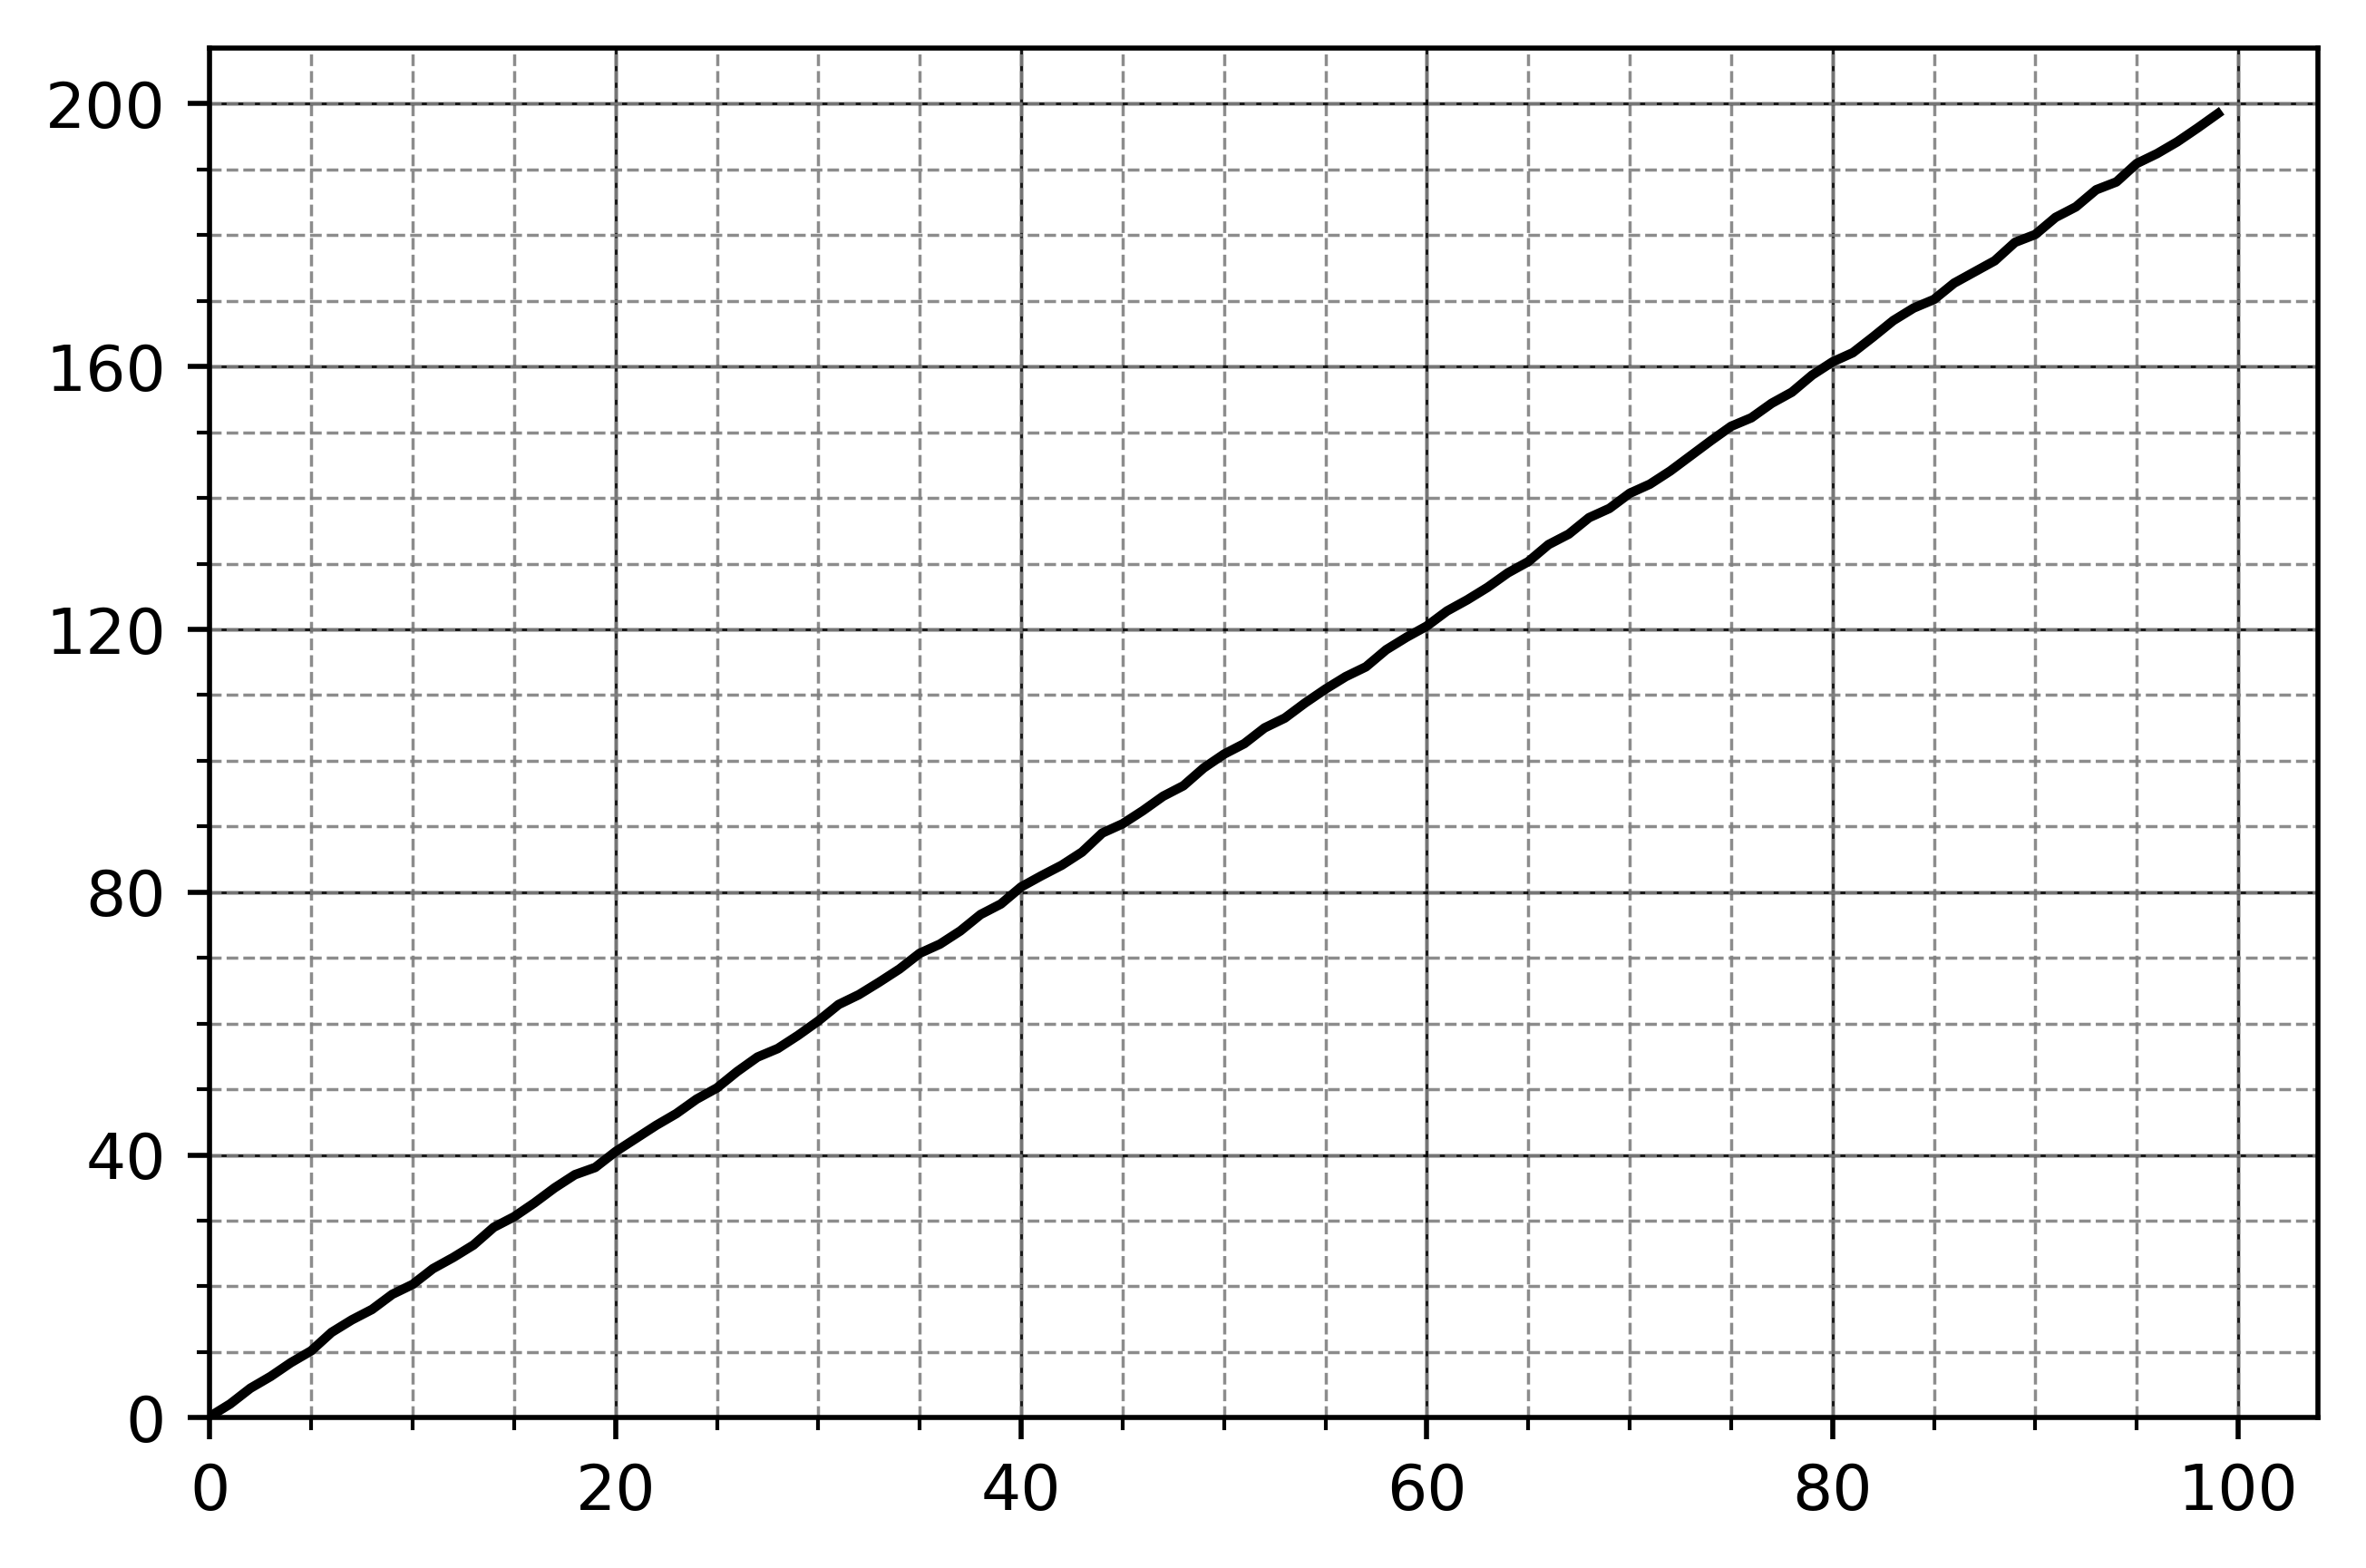

In [63]:
plt.savefig("out_graph.pdf", fmt='pdf')
plt.show()